In [ ]:
#Télécharger google drive dans notre colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing librar
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [ ]:
# Create Path fro Both (Train/Test)
train_loc = 'DATA/train/'
test_loc = 'DATA/test/'

In [ ]:
#augmentation des données
#pour train data
trdata = ImageDataGenerator(rescale = 1./255, #normalisation des images(0<pixel<1)
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip =True,
                            )
#resize images
traindata = trdata.flow_from_directory( directory = train_loc, target_size = (224, 224))

#pour test data
tsdata = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            )

testndata = tsdata.flow_from_directory( directory = test_loc, target_size = (224, 224))

Found 250 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [ ]:
# séparer les deux classe 0 pour covid+ et 1 pour covid-
traindata.class_indices

{'COVID+': 0, 'COVID-': 1}

In [ ]:
# define input 
input_shape = (224,224,3) #taille de l'image d'entrée 224x224

# construire le modèle CNN
# Input Layer
img_input = Input(shape = input_shape, name = 'img_input')


In [ ]:
      #partie convolutive
# Convo layers
#conv2d(32, (3,3)=>32 filtre de taille 3X3 
x = Conv2D(32, (3,3) , padding = 'same', activation='relu', name ='layer_1') (img_input)
x = Conv2D(64, (3,3) , padding = 'same', activation='relu', name ='layer_2') (x)
#MaxPool2D((2,2)=>réduire la taille de l'image ,strides=(2,2) glissement de 2X2
x = MaxPool2D((2,2), strides=(2,2), name ='layer_3') (x)
# couche sortie: dropout=0,25 pour améliorer la performance 
x =Dropout(0.25)(x)


In [ ]:
x = Conv2D(64, (3,3) , padding = 'same', activation='relu', name ='layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name ='layer_5') (x)
x =Dropout(0.25)(x)

In [ ]:
x = Conv2D(128, (3,3) , padding = 'same', activation='relu', name ='layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name ='layer_7') (x)
x =Dropout(0.25)(x)

      # la partie de classification
x =Flatten(name='layer_8')(x)
# 64 neuronnes
x = Dense(64, name = 'layer_9')(x)
x =Dropout(0.5)(x)
#on a deux classe dans la sortie (COVID+ ou COVID-)
x =Dense(2, activation='sigmoid', name ='predections')(x)

In [ ]:
# génération du modèle
model = Model(inputs = img_input, outputs  =x, name = 'CNN_COVID_19' )

In [ ]:
# afficher la structure du réseau CNN
model.summary()

Model: "CNN_COVID_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 112, 112, 64)      0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 112, 112, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 56, 56, 64)       

In [ ]:
# Compiler le modèle
model.compile(optimizer = 'adam', loss = binary_crossentropy , metrics=['accuracy'])

In [ ]:
# on prend 32 images de données d'apprentissage pour chaque itération
batch_size = 32  
#l'historique de l'apprentissage
hist = model.fit(traindata, 
                 steps_per_epoch = traindata.samples//batch_size,#250/32=7 itération pour le trainig dans chaque epoch
                 validation_data = testndata,
                 validation_steps = testndata.samples//batch_size,#110/32=3 itération pour le test
                 epochs = 10  #on a préciser 10 epoch
                 )

Epoch 1/10
7/7 [==============================] - 68s 8s/step - loss: 1.7630 - accuracy: 0.6881 - val_loss: 0.6722 - val_accuracy: 0.8125
Epoch 2/10
7/7 [==============================] - 14s 2s/step - loss: 0.5320 - accuracy: 0.7890 - val_loss: 0.4082 - val_accuracy: 0.8542
Epoch 3/10
7/7 [==============================] - 14s 2s/step - loss: 0.3823 - accuracy: 0.8532 - val_loss: 0.4039 - val_accuracy: 0.8229
Epoch 4/10
7/7 [==============================] - 14s 2s/step - loss: 0.3448 - accuracy: 0.8991 - val_loss: 0.3730 - val_accuracy: 0.9167
Epoch 5/10
7/7 [==============================] - 14s 2s/step - loss: 0.2382 - accuracy: 0.9152 - val_loss: 0.2894 - val_accuracy: 0.9062
Epoch 6/10
7/7 [==============================] - 14s 2s/step - loss: 0.2710 - accuracy: 0.9107 - val_loss: 0.2318 - val_accuracy: 0.9583
Epoch 7/10
7/7 [==============================] - 14s 2s/step - loss: 0.2196 - accuracy: 0.9312 - val_loss: 0.3337 - val_accuracy: 0.9062
Epoch 8/10
7/7 [==================

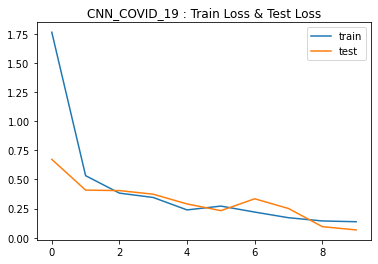

In [ ]:
#plot la perte de train data et test data
plt.plot(hist.history['loss'], label = 'train') 
plt.plot(hist.history['val_loss'], label= 'test') 
plt.title('CNN_COVID_19 : Train Loss & Test Loss')
plt.legend()
plt.show()

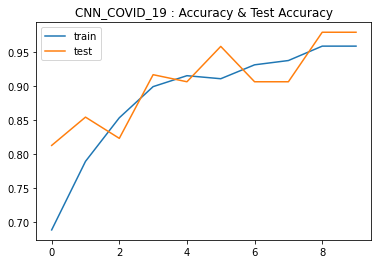

In [ ]:
#plot la précision de train data et test data
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label= 'test')
plt.title('CNN_COVID_19 : Accuracy & Test Accuracy')
plt.legend()
plt.show()